In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the functions based on the table for the 1st, 4th, and 8th LZSM models
# 1st model
def f1(x):
    return np.ones_like(x)

def g1(x):
    return x

# 4th model
def f4(x):
    return (3/2) * np.cos(x)

def g4(x):
    return np.pi**2 / 8 * np.sin(2 * x)

# 8th model
def f8(x):
    return (3/0.934392382036) / np.cosh(x)

def g8(x):
    return (3/0.934392382036) * np.arctan(np.sinh(x)) / np.cosh(x)


In [6]:
# Define the functions based on the table for the 1st, 4th, and 8th AEH models
# 1st model
def f1(x):
    return np.ones_like(x)

def g1(x):
    return np.tan(x)

# 4th model
def f4(x):
    return (3/2) * np.cos(x)

def g4(x):
    return (3/2) * np.cos(x) * np.tan((3/2) * np.sin(x))

# 8th model
def f8(x):
    return (3/0.934392382036) / np.cosh(x)

def g8(x):
    return (3/0.934392382036) * np.tanh(x)

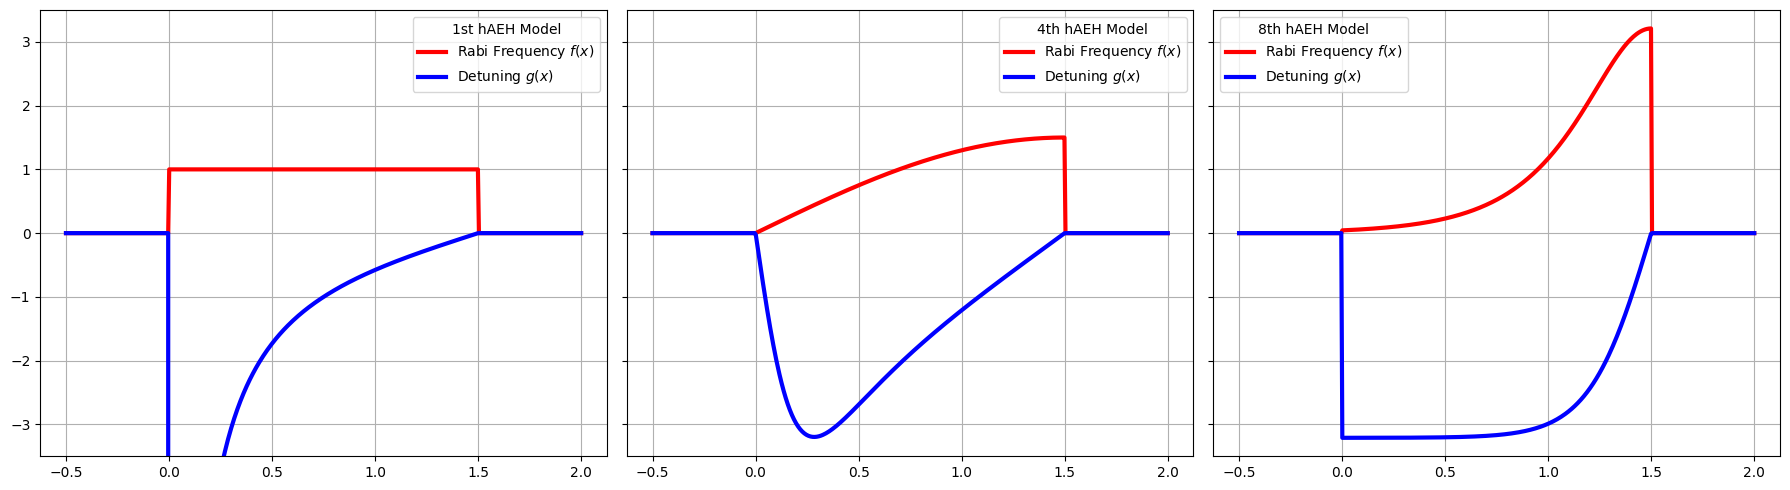

In [8]:
model_name = "hAEH"
T = 3
tau14 = T / np.pi
tau = 0.3
ylim = 3.5
# Define t range
t = np.linspace(-0.5, 0.5*T+0.5, 500)

x14 = (t - T/2) / tau14
x = (t - T/2) / tau
# Compute values
f1_vals, g1_vals = f1(x14), g1(x14)
f4_vals, g4_vals = f4(x14), g4(x14)
f8_vals, g8_vals = f8(x), g8(x)

# def truncate(t, f):
#     return f * np.heaviside(t, 0) * np.heaviside(T-t, 0)
def truncate(t, f):
    return f * np.heaviside(t, 0) * np.heaviside(T/2-t, 0)

# Create a horizontal grid of 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1st model plot
axes[0].plot(t, truncate(t,f1_vals), color='red', linewidth=3, label='Rabi Frequency $f(x)$')
axes[0].plot(t, truncate(t,g1_vals), color='blue', linewidth=3, label='Detuning $g(x)$')
axes[0].legend(title=f'1st {model_name} Model')
axes[0].set_ylim((-ylim,ylim))
axes[0].grid(True)

# 4th model plot
axes[1].plot(t, truncate(t,f4_vals), color='red', linewidth=3, label='Rabi Frequency $f(x)$')
axes[1].plot(t, truncate(t,g4_vals), color='blue', linewidth=3, label='Detuning $g(x)$')
axes[1].legend(title=f'4th {model_name} Model')
axes[1].set_ylim((-ylim,ylim))
axes[1].grid(True)

# 8th model plot
axes[2].plot(t, truncate(t,f8_vals), color='red', linewidth=3, label='Rabi Frequency $f(x)$')
axes[2].plot(t, truncate(t,g8_vals), color='blue', linewidth=3, label='Detuning $g(x)$')
axes[2].legend(title=f'8th {model_name} Model')
axes[2].set_ylim((-ylim,ylim))
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig(f"C:/Users/Ivo/Documents/qiskit_codes/paper_ready_plots/time_dep/{model_name}.pdf")
plt.show()


In [49]:
# Define the functions based on the table for the 1st, 4th, and 8th LZSM models
# Bambini-Berman model
def fbb(x):
    return 1 / np.cosh(x)
 
def gbb(x):
    return 1 + np.tanh(x)

# CosSin model
def fcs(x):
    return np.cos(x) ** 2

def gcs(x):
    return np.sin(x) ** 2



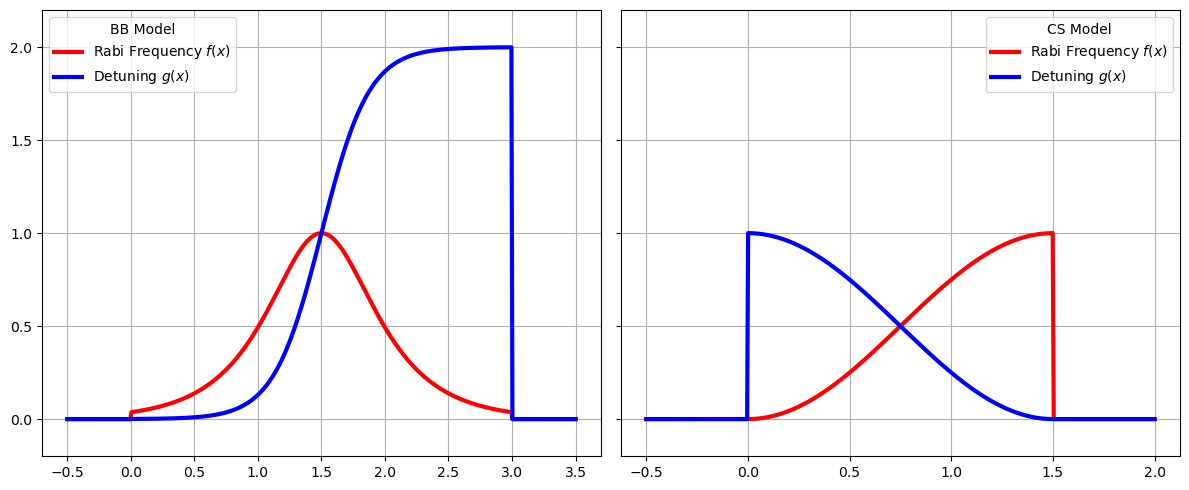

In [63]:
model_name = "BBCS"
T = 3
tau1 = T / 8
tau = T / np.pi
ymin = 0.2
ymax = 2.2
# Define t range
t = np.linspace(-0.5, T+0.5, 500)
t2 = np.linspace(-0.5, 0.5*T+0.5, 500)
x = (t - T/2) / tau1
x2 = (t2 - T/2) / tau
# Compute values
fbb_vals, gbb_vals = fbb(x), gbb(x)
fcs_vals, gcs_vals = fcs(x2), gcs(x2)

def truncate(t, f):
    return f * np.heaviside(t, 0) * np.heaviside(T-t, 0)
def truncate2(t, f):
    return f * np.heaviside(t, 0) * np.heaviside(T/2-t, 0)
# Create a horizontal grid of 2 plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# BB model plot
axes[0].plot(t, truncate(t,fbb_vals), color='red', linewidth=3, label='Rabi Frequency $f(x)$')
axes[0].plot(t, truncate(t,gbb_vals), color='blue', linewidth=3, label='Detuning $g(x)$')
axes[0].legend(title=f'BB Model')
axes[0].set_ylim((-ymin,ymax))
axes[0].grid(True)

# CS model plot
axes[1].plot(t2, truncate2(t2,fcs_vals), color='red', linewidth=3, label='Rabi Frequency $f(x)$')
axes[1].plot(t2, truncate2(t2,gcs_vals), color='blue', linewidth=3, label='Detuning $g(x)$')
axes[1].legend(title=f"CS Model")
axes[1].set_ylim((-ymin,ymax))
axes[1].grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig(f"C:/Users/Ivo/Documents/qiskit_experiments/paper_ready_plots/time_dep/{model_name}.pdf")
plt.show()
